In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
cancer_data = pd.read_csv("../datasets/cancer.csv")
print(cancer_data.shape)
cancer_labels = np.array([1 if l == 'M' else 0 for l in cancer_data['label'].values])
cancer_features = cancer_data.drop(['label'], axis=1).values
cancer_data.head()

(569, 31)


,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
spam_data = pd.read_csv("../datasets/spam.csv")
print(spam_data.shape)
spam_labels = spam_data['label'].values
spam_features = spam_data.drop(['label'], axis=1).values
spam_data.head()

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
def roc(y_pr, y_true):
    tps = []
    fps = []
    gt_true = len(list(filter(lambda x: x == 1, y_true)))
    gt_false = len(list(filter(lambda x: x == 0, y_true)))
    ys = zip(y_pr, y_true)
    ys = sorted(ys)
    true_positive = gt_true
    false_positive = gt_false
    prev_p = None
    i = 0
    while i < len(ys):
        y_p, y_t = ys[i]
        prev_p = y_p
        while i < len(ys) and y_p == prev_p:
            if y_t == 1:
                true_positive -= 1
            if y_t == 0:
                false_positive -= 1
            i += 1
            if i == len(ys):
                break
            y_p, y_t = ys[i]
        prev_p = y_p
        fps.append(false_positive / gt_false)
        tps.append(true_positive / gt_true)
#     print(tps)
#     print(fps)
    return tps[::-1], fps[::-1]

def roc_auc(y_pr, y_true):
    tps, fps = roc(y_pr, y_true)
    prev_tp = tps[0]
    prev_fp = fps[0]
    area = 0
    for tp, fp in zip(tps, fps):
        area += (fp - prev_fp) * (prev_tp + tp) / 2
        prev_tp = tp
        prev_fp = fp
    return area

In [5]:
def top3_features(X, y):
    features_score = [(roc_auc(X[:, i], y), i) for i in range(X.shape[1])]
    top_features = sorted(features_score, reverse=True)[:3]
    for auc, i in top_features:
        tps, fps = roc(X[:, i], y)
        plt.plot(fps, tps)
        plt.title(f"{i}-th feature with auc = {round(auc, 4)}")
        plt.show()

cancer


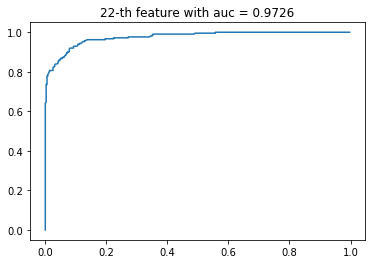

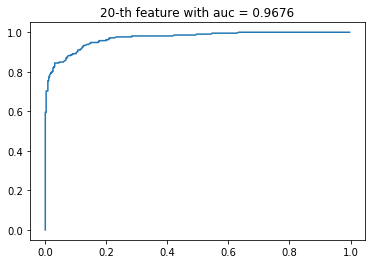

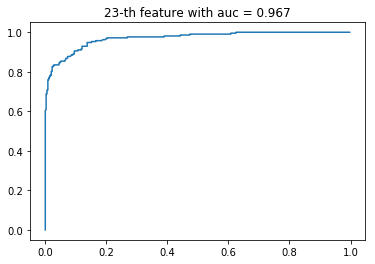

spam


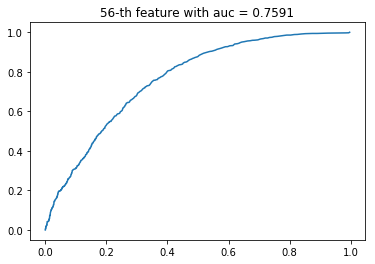

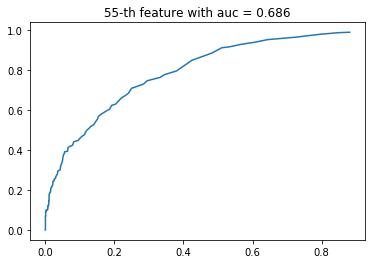

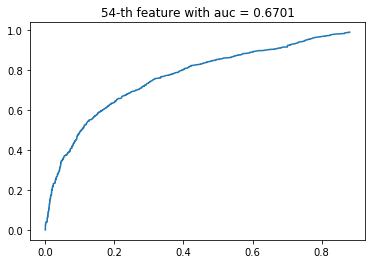

In [6]:
print("cancer")
top3_features(cancer_features, cancer_labels)
print("spam")
top3_features(spam_features, spam_labels)

In [7]:
cancer_features_tr, cancer_features_te, cancer_labels_tr, cancer_labels_te = train_test_split(cancer_features, cancer_labels, train_size=0.8)
spam_features_tr, spam_features_te, spam_labels_tr, spam_labels_te = train_test_split(spam_features, spam_labels, train_size=0.8)
print(np.mean(cancer_labels_tr), np.mean(cancer_labels_te))
print(np.mean(spam_labels_tr), np.mean(spam_labels_te))

0.378021978021978 0.3508771929824561
0.39456521739130435 0.3919652551574376


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
def misclassify(ys):
    c = max(Counter(ys).values())
    return 1 - c / len(ys)

def entropy(ys):
    ent = 0
    for l in Counter(ys).values():
        p = l / len(ys)
        ent -= p * np.log(p)
    return ent

def gini(ys):
    ent = 0
    for l in Counter(ys).values():
        p = l / len(ys)
        ent += p * (1 - p)
    return ent

In [9]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=6, impurity=gini):
        self.max_depth = max_depth
        self.impurity = impurity

    def fit(self, X, y):
        self.value = Counter(y).most_common(1)[0][0]
        self.depth = 0
        self.is_terminal = True
        if self.max_depth == 0:
            self.is_terminal = True
            return self
        node_gain = self.impurity(y) * len(y)
        max_gain = 0
        for feature_ind in range(X.shape[1]):
            features_values = sorted(list(set(X[:, feature_ind])))
            for th in features_values:
                left_y = y[X[:, feature_ind] <= th]
                right_y = y[X[:, feature_ind] > th]
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                left_gain = self.impurity(left_y)
                right_gain = self.impurity(right_y)
                gain = node_gain - left_gain * len(left_y) - right_gain * len(right_y)
                if max_gain < gain:
                    max_gain = gain
                    self.feature_ind = feature_ind
                    self.th = th
        if max_gain > 0:
            self.is_terminal = False
            self.left = DecisionTreeClassifier(self.max_depth - 1, self.impurity)
            self.right = DecisionTreeClassifier(self.max_depth - 1, self.impurity)
            self.left.fit(X[X[:, self.feature_ind] <= self.th], y[X[:, self.feature_ind] <= self.th])
            self.right.fit(X[X[:, self.feature_ind] > self.th], y[X[:, self.feature_ind] > self.th])
            self.depth = max(self.left.depth, self.right.depth) + 1
        return self

    def predict(self, X):
        if self.is_terminal:
            return np.array([self.value for _ in range(X.shape[0])])
        else:
            y = np.array([0 for _ in range(X.shape[0])])
            y[X[:, self.feature_ind] <= self.th] = self.left.predict(X[X[:, self.feature_ind] <= self.th])
            y[X[:, self.feature_ind] > self.th] = self.right.predict(X[X[:, self.feature_ind] > self.th])
            return y

In [10]:
def find_best_depth(X_tr, y_tr, X_te, y_te, impurity):
    for i in range(1, 11):
        tree = DecisionTreeClassifier(i, impurity).fit(X_tr, y_tr)
        y_pr = tree.predict(X_te)
        acc = np.mean(y_pr == y_te)
        print(f"#Max depth: {i}, Real depth: {tree.depth}, accuracy = {acc}")

In [15]:
print("Cancer")
print("Misclassification error")
find_best_depth(cancer_features_tr, cancer_labels_tr, cancer_features_te, cancer_labels_te, misclassify)
print("Entropy")
find_best_depth(cancer_features_tr, cancer_labels_tr, cancer_features_te, cancer_labels_te, entropy)
print("Gini")
find_best_depth(cancer_features_tr, cancer_labels_tr, cancer_features_te, cancer_labels_te, gini)

Cancer
Misclassification error
#Max depth: 1, Real depth: 1, accuracy = 0.8421052631578947
#Max depth: 2, Real depth: 2, accuracy = 0.8947368421052632
#Max depth: 3, Real depth: 3, accuracy = 0.9122807017543859
#Max depth: 4, Real depth: 4, accuracy = 0.9035087719298246
#Max depth: 5, Real depth: 5, accuracy = 0.9210526315789473
#Max depth: 6, Real depth: 6, accuracy = 0.9210526315789473
#Max depth: 7, Real depth: 7, accuracy = 0.9210526315789473
#Max depth: 8, Real depth: 8, accuracy = 0.9210526315789473
#Max depth: 9, Real depth: 8, accuracy = 0.9210526315789473
#Max depth: 10, Real depth: 8, accuracy = 0.9210526315789473
Entropy
#Max depth: 1, Real depth: 1, accuracy = 0.8596491228070176
#Max depth: 2, Real depth: 2, accuracy = 0.8421052631578947
#Max depth: 3, Real depth: 3, accuracy = 0.9298245614035088
#Max depth: 4, Real depth: 4, accuracy = 0.9385964912280702
#Max depth: 5, Real depth: 5, accuracy = 0.9298245614035088
#Max depth: 6, Real depth: 5, accuracy = 0.9298245614035088


In [16]:
print("Spam")
print("Misclassification error")
find_best_depth(spam_features_tr, spam_labels_tr, spam_features_te, spam_labels_te, misclassify)
print("Entropy")
find_best_depth(spam_features_tr, spam_labels_tr, spam_features_te, spam_labels_te, entropy)
print("Gini")
find_best_depth(spam_features_tr, spam_labels_tr, spam_features_te, spam_labels_te, gini)

Spam
Misclassification error
#Max depth: 1, Real depth: 1, accuracy = 0.7947882736156352
#Max depth: 2, Real depth: 2, accuracy = 0.8566775244299675
#Max depth: 3, Real depth: 3, accuracy = 0.8838219326818675
#Max depth: 4, Real depth: 4, accuracy = 0.9044516829533116
#Max depth: 5, Real depth: 5, accuracy = 0.9011943539630836
#Max depth: 6, Real depth: 6, accuracy = 0.9022801302931596
#Max depth: 7, Real depth: 7, accuracy = 0.9098805646036916
#Max depth: 8, Real depth: 8, accuracy = 0.9077090119435396
#Max depth: 9, Real depth: 9, accuracy = 0.9077090119435396
#Max depth: 10, Real depth: 10, accuracy = 0.9098805646036916
Entropy
#Max depth: 1, Real depth: 1, accuracy = 0.7904451682953312
#Max depth: 2, Real depth: 2, accuracy = 0.8208469055374593
#Max depth: 3, Real depth: 3, accuracy = 0.8642779587404995
#Max depth: 4, Real depth: 4, accuracy = 0.8968512486427795
#Max depth: 5, Real depth: 5, accuracy = 0.8990228013029316
#Max depth: 6, Real depth: 6, accuracy = 0.9066232356134636
#